In [1]:
import anndata
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
rna = anndata.read_h5ad("/lmh_data/data/sclab/GSE223917/rna_result_test.h5ad")
hic = anndata.read_h5ad("/lmh_data/data/sclab/GSE223917/hic_result_test.h5ad")

/root/miniconda3/envs/sclab/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/root/miniconda3/envs/sclab/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:325: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = ax.scatter(
/root/miniconda3/envs/sclab/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:325: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = ax.scatter(


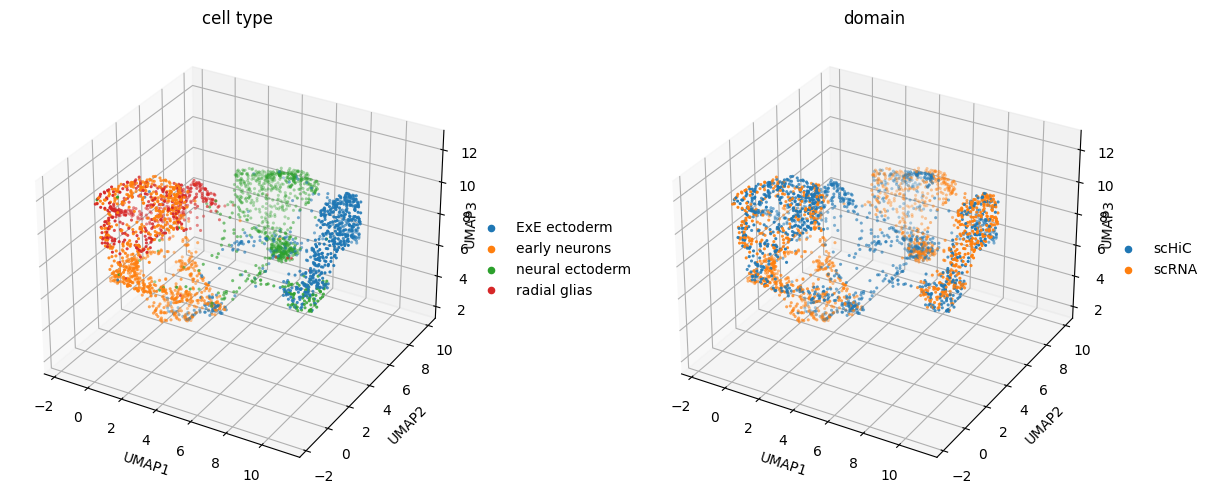

In [3]:
combined = anndata.concat([rna, hic])
sc.pp.neighbors(combined, use_rep="X_glue", metric="cosine")
sc.tl.umap(combined, n_components=3)

fig = plt.figure(figsize=(12,5), constrained_layout=True)
axs = [
    fig.add_subplot(1, 2, 1, projection='3d'),
    fig.add_subplot(1, 2, 2, projection='3d')
]

sc.pl.umap(combined, color="cell_type", title="cell type", ax=axs[0], show=False, projection='3d')
sc.pl.umap(combined, color="domain", title="domain", ax=axs[1], show=False, projection='3d')

axs[0].set_xscale('linear')
axs[0].set_yscale('linear')
axs[0].set_zscale('linear')

axs[1].set_xscale('linear')
axs[1].set_yscale('linear')
axs[1].set_zscale('linear')

plt.show()

In [4]:
_distances = []
for _index in combined.obs.index.unique():
    _umap = combined[_index].obsm['X_umap']
    _distance = float(np.sqrt(np.sum((_umap[0] - _umap[1])**2)))
    _distances.append(_distance)

In [5]:
_common_distances = []
for i in range(1000):
    _umap = combined.obsm['X_umap'][np.random.randint(0, combined.obsm['X_umap'].shape[0], 2)]
    _distance = float(np.sqrt(np.sum((_umap[0] - _umap[1])**2)))
    _common_distances.append(_distance)
np.mean(_common_distances)

6.556656326562166

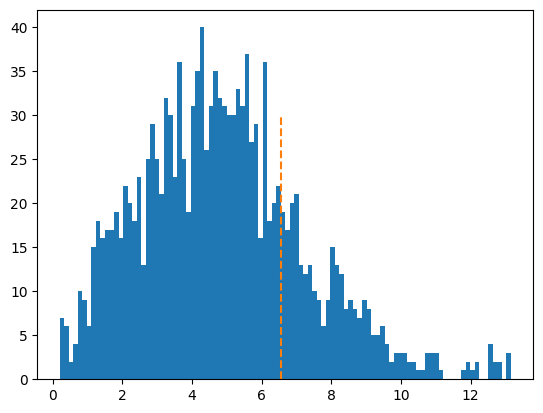

In [6]:
plt.hist(_distances, 100)
plt.plot([np.mean(_common_distances), np.mean(_common_distances)], [0, 30], linestyle='--')
plt.show()